In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"B:\DATA ANALYST PROJECTS\POWERBI + PYTHON + SQL\WALMART SALES ANALYSIS\Sales.csv.csv")

In [3]:
df.shape

(1000, 17)

In [18]:
df.head(1000)

,Invoice_ID,Branch,City,Customer_type,Gender,Sub_category,Unit_price,Quantity,Tax_5_per,Total,full_Date,full_Time,Payment,cogs,gross_margin_percentage,gross_income,Rating,time_of_day,Day_Name,Month_Name
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2024-04-10 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon,Saturday,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2024-04-10 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Morning,Friday,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2024-04-10 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Afternoon,Sunday,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2024-04-10 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Evening,Sunday,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2024-04-10 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Morning,Friday,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2024-04-10 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Afternoon,Tuesday,January
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2024-04-10 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Evening,Saturday,March
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2024-04-10 13:22:00,Cash,31.84,4.761905,1.5920,7.7,Afternoon,Saturday,February
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2024-04-10 15:33:00,Cash,65.82,4.761905,3.2910,4.1,Afternoon,Friday,February


**#FEATURE ENGINEERING**

**1.Add a new column named `time_of_day` to give insight of sales in the Morning,Afternoon and Evening. This
will help answer the question on which part of the day most sales are made**

In [5]:
df['full_Time'] = pd.to_datetime(df['full_Time'])
df['hour'] = df['full_Time'].dt.hour
def categorize_hour(hour):
    if 0 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    else:
        return 'Evening'

df['time_of_day'] = df['hour'].apply(categorize_hour)
df.drop('hour', axis=1, inplace=True)

**2.Add a new column named `day_name` that contains the extracted days of the week on which 
the giventransaction took place (Mon, Tue, Wed, Thur, Fri). 
This will help answer the question on which week of the dayeach branch is busiest.**

In [6]:
df['full_Date'] = pd.to_datetime(df['full_Date'])
df['Day_Name'] = df['full_Date'].dt.day_name()

**3.Add a new column named `month_name` that contains the extracted months of the year on which the 
giventransaction took place (Jan, Feb, Mar). 
Help determine which month of the year has the most sales and profit.**

In [7]:
df['full_Date'] = pd.to_datetime(df['full_Date'])
df['Month_Name'] = df['full_Date'].dt.strftime('%B')

**#DATA CLEANING**

In [9]:
df.shape

(1000, 20)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice_ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer_type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Sub_category             1000 non-null   object        
 6   Unit_price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax_5_per                1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  full_Date                1000 non-null   datetime64[ns]
 11  full_Time                1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [16]:
pd.isnull(df).sum()

Invoice_ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Sub_category               0
Unit_price                 0
Quantity                   0
Tax_5_per                  0
Total                      0
full_Date                  0
full_Time                  0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
time_of_day                0
Day_Name                   0
Month_Name                 0
dtype: int64

In [19]:
df.drop('gross_margin_percentage',axis=1,inplace=True)

In [21]:
df.shape

(1000, 19)

In [20]:
df.describe()

,Unit_price,Quantity,Tax_5_per,Total,cogs,gross_income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,49.650000,10.00000


In [13]:
df.columns

Index(['Invoice_ID', 'Branch', 'City', 'Customer_type', 'Gender',
       'Sub_category', 'Unit_price', 'Quantity', 'Tax_5_per', 'Total',
       'full_Date', 'full_Time', 'Payment', 'cogs', 'gross_margin_percentage',
       'gross_income', 'Rating', 'time_of_day', 'Day_Name', 'Month_Name'],
      dtype='object')

**BUSINESS QUESTION TO ANSWER**

# A-GENERIC QUESTIONS-

1) Find The Total Sum Of Revenue..?

In [110]:
total_revenue=df['Total'].sum().round(2)
total_revenue

322966.75

2) How many unique product lines does the data have?

In [111]:
unique_productlines=df['Sub_category'].nunique()
unique_productlines

6

3) How many unique cities does the data have?

In [112]:
unique_cities=df['City'].nunique()
unique_cities

3

4) Find The Total Branches Available In This data.

In [113]:
total_Branches=df['Branch'].nunique()
total_Branches

3

# B-PRODUCT QUESTIONS

1) What is the most common payment method?

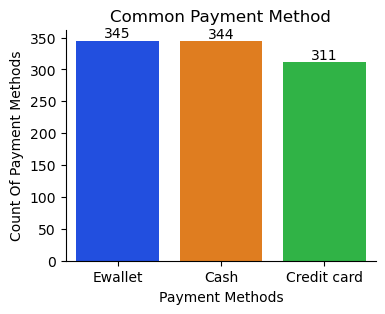

In [114]:
common_pay_method = df['Payment'].value_counts()
plt.figure(figsize=(4, 3)) 
pay_met=sns.barplot(x=common_pay_method.index,y=common_pay_method.values,palette='bright')
pay_met.bar_label(pay_met.containers[0])
sns.despine()

plt.title('Common Payment Method')
plt.xlabel('Payment Methods')
plt.ylabel('Count Of Payment Methods')
plt.show()

**MOST OF THE CUSTOMER CAN PAY THEIR PAYMENT THROUGH THE EWALLET FOLLOWED BY CASH ,IF YOU WANT CUSTOMER CAN PAY THROUGH CREDIT
CARD TRY TO ADD SOME OFFERS FOR CREDIT CARD**

2) What is the most selling product line?

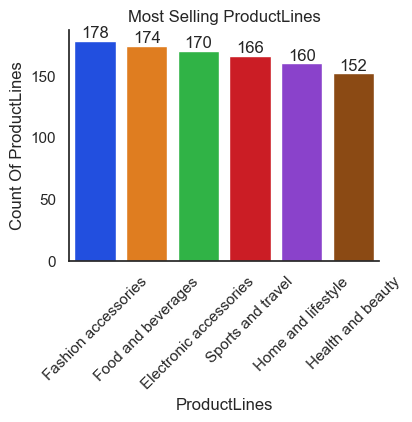

In [216]:
most_selling_productline = df['Sub_category'].value_counts()
plt.figure(figsize=(4, 3)) 
pay_met=sns.barplot(x=most_selling_productline.index,y=most_selling_productline.values,palette='bright')
pay_met.bar_label(pay_met.containers[0])
sns.despine()

plt.title('Most Selling ProductLines')
plt.xlabel('ProductLines')
plt.xticks(rotation=45)
plt.ylabel('Count Of ProductLines')
plt.show()

**FASHION ACCESSORIES IS THE MOST SELLING PRODUCT LINE FOLLOWED BY FOOD & BEVERAGES WHILE HEALTH & BEAUTY IS THE LOWEST 
SELLING PRODUCT LINES**

3) What is the most common product line by gender?

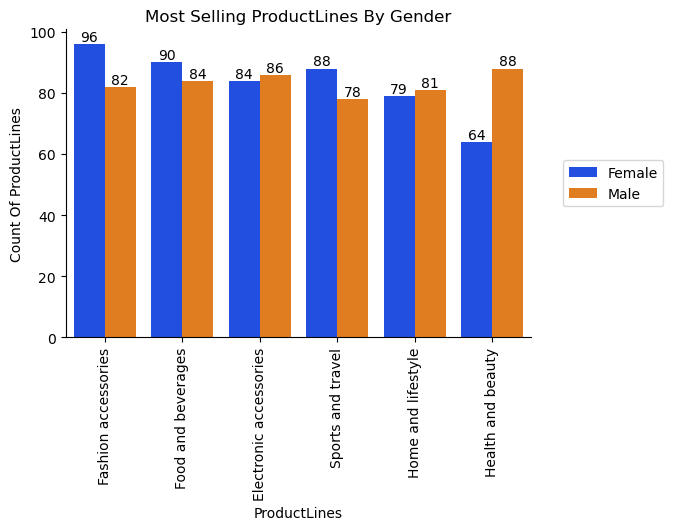

In [133]:
plt.figure(figsize=(6, 4)) 
cnt = sns.countplot(x='Sub_category', data=df, hue='Gender', palette='bright', order=df['Sub_category'].value_counts().index)
cnt.bar_label(cnt.containers[0])
cnt.bar_label(cnt.containers[1])
sns.despine()

plt.title('Most Selling ProductLines By Gender')
plt.xlabel('ProductLines')
plt.xticks(rotation=90)
plt.ylabel('Count Of ProductLines')
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.show()


**FASHION & ACCESSORIES IS THE MOST HIGHEST COMMON PRODUCT LINE & HEALTH & BEAUTY IS THE LOWEST COMMON PRODUCT LINE** 

4) What product line had the largest revenue?

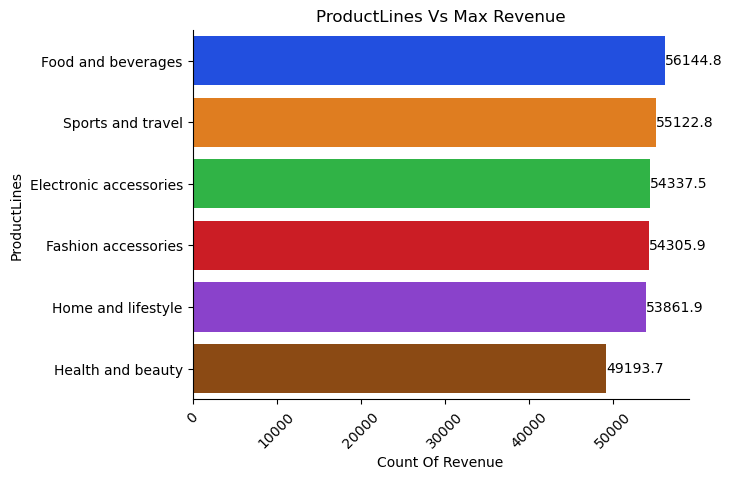

In [116]:
productline_revenue = df.groupby(['Sub_category'],as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)
cnt=sns.barplot(x='Total',y='Sub_category',data=productline_revenue,palette='bright')
cnt.bar_label(cnt.containers[0])
sns.despine()

plt.title('ProductLines Vs Max Revenue')
plt.xlabel('Count Of Revenue')
plt.xticks(rotation=45)
plt.ylabel('ProductLines')
plt.show()

**FOOD & BEVERAGE PRODUCT LINE HAS THE LARGEST REVENUE & HEALTH,BEAUTY PRODUCTLINE IS THE LOWEST REVENUE**

5) What product line had the largest VAT?

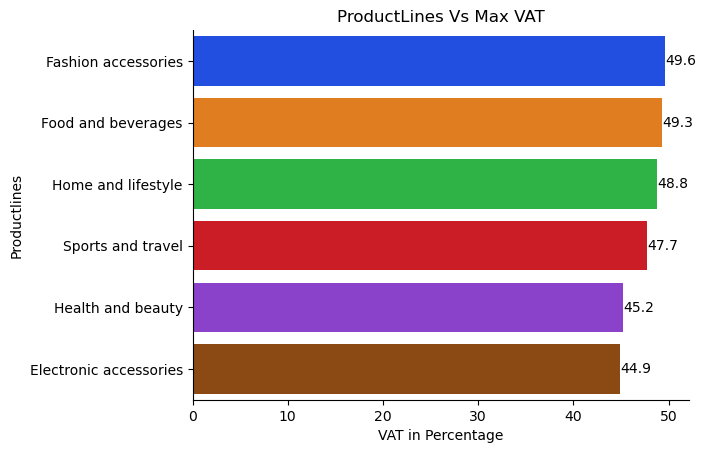

In [117]:
productline_VAT = df.groupby(['Sub_category'],as_index=False)['Tax_5_per'].max().round(1).sort_values(by='Tax_5_per',ascending=False)
xyz = sns.barplot(y='Sub_category', x='Tax_5_per',data=productline_VAT,palette='bright')
xyz.bar_label(xyz.containers[0])

sns.despine()
plt.title('ProductLines Vs Max VAT')
plt.xlabel('VAT in Percentage')
plt.ylabel('Productlines')
plt.show()

**LARGEST VAT ON PRODUCT LINE - FASHION ACCESSORIES (49.6)**

**LOWEST VAT ON PRODUCT LINE -ELECTRONIC ACCESSORIES (44.9)**

6) What is the total revenue by month?

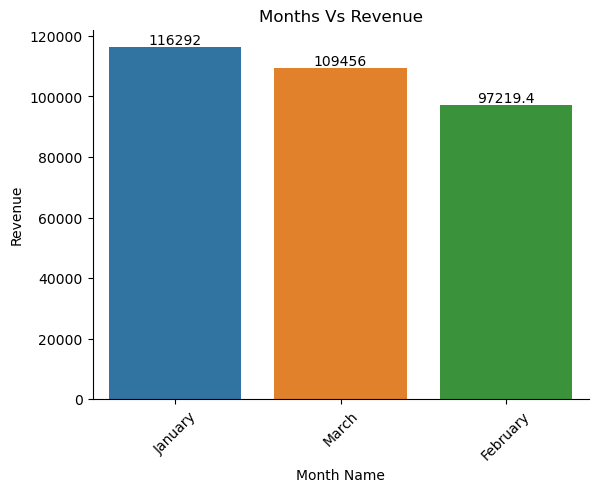

In [118]:
revenue_by_month=df.groupby(['Month_Name'],as_index=False)['Total'].sum().round(1).sort_values(by='Total',ascending=False)
xyz=sns.barplot(x='Month_Name',y='Total',data=revenue_by_month)
xyz.bar_label(xyz.containers[0])
sns.despine()
plt.title('Months Vs Revenue')
plt.xlabel('Month Name')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.show()

**MAX REVENUE MONTH - JANUARY (116292)**

**MIN REVENUE MONTH - FEBRUARY (97219.4)**

7) What month had the largest COGS?

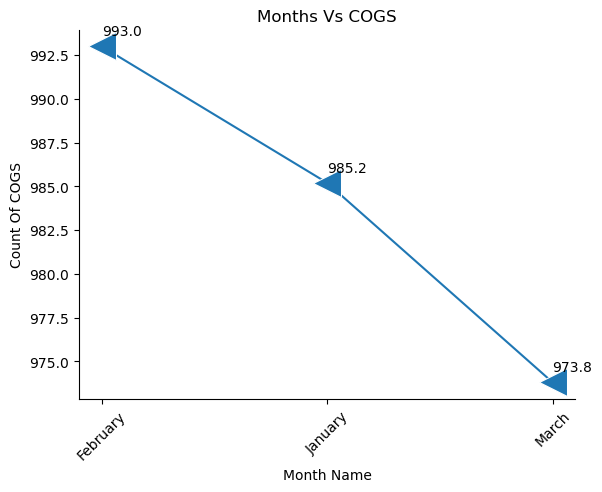

In [38]:
month_with_cogs=df.groupby(['Month_Name'],as_index=False)['cogs'].max().round(2).sort_values(by='cogs',ascending=False)
sns.lineplot(x='Month_Name',y='cogs',data=month_with_cogs, marker='<', markersize=20)
for x, y in zip(month_with_cogs['Month_Name'], month_with_cogs['cogs']):
    y_rounded = round(y, 2)
    plt.annotate(f'{y_rounded}', (x, y), textcoords="offset points", xytext=(0,8), ha='left')

sns.despine()
plt.title('Months Vs COGS')
plt.xlabel('Month Name')
plt.xticks(rotation=45)
plt.ylabel('Count Of COGS')
plt.show()

**MAX COGS MONTH - FEBRUARY (993.0)**

**MIN COGS MONTH - MARCH (973.8)**

8) What is the city with the largest revenue?

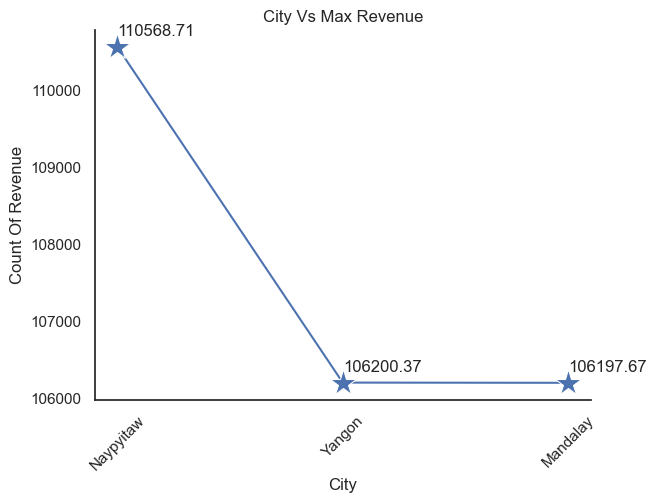

In [217]:
City_With_Largest_Revenue = df.groupby('City')['Total'].sum().round(2).sort_values(ascending=False)
sns.lineplot(x=City_With_Largest_Revenue.index, y=City_With_Largest_Revenue.values, marker='*', markersize=20)

for x, y in zip(City_With_Largest_Revenue.index, City_With_Largest_Revenue.values):
    y_rounded = round(y, 2)
    plt.annotate(f'{y_rounded}', (x, y), textcoords="offset points", xytext=(0,8), ha='left')

sns.despine()
plt.title('City Vs Max Revenue')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.ylabel('Count Of Revenue')
plt.show()

**MAX REVENUE CITY - NAYPYITAW (110568.71)**

**MIN REVENUE CITY- MANDALAY (106197.67)**

9) Which branch sold more products than average product sold?

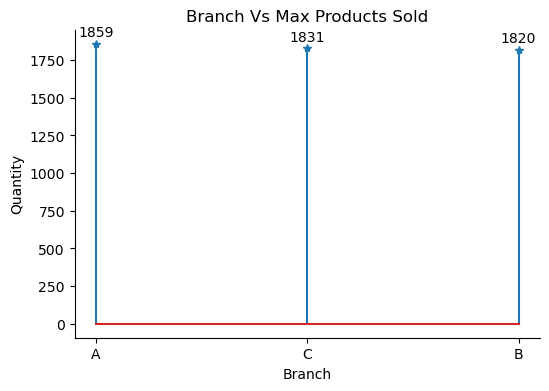

In [58]:
plt.figure(figsize=(6, 4))
branch_with_max_product = df.groupby('Branch')['Quantity'].sum().round(2).sort_values(ascending=False)

stem = plt.stem(branch_with_max_product.index, branch_with_max_product.values,markerfmt='*')
for i in range(len(branch_with_max_product)):
    plt.annotate(branch_with_max_product.values[i], (branch_with_max_product.index[i], branch_with_max_product.values[i]), textcoords="offset points", xytext=(0,5), ha='center')

sns.despine()
plt.title('Branch Vs Max Products Sold')
plt.xlabel('Branch')
plt.ylabel('Quantity')
plt.show()

**BRANCH WITH MAX PRODUCT SOLD - A (1859)**

**BRANCH WITH LOW PRODUCT SOLD - B(1820)**

10) What is the average rating of each product line?

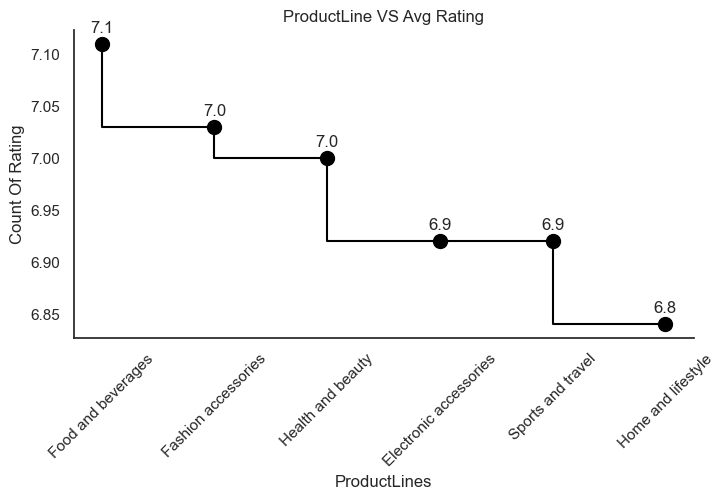

In [218]:
Avg_productline_Rating = df.groupby('Sub_category')['Rating'].mean().round(2).sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.set(style='white')
plt.step(x=Avg_productline_Rating.index, y=Avg_productline_Rating.values, color='Black', marker='o', markerfacecolor='black', markersize=10)

for x, y in zip(Avg_productline_Rating.index, Avg_productline_Rating.values):
    y_rounded = round(y, 1)
    plt.annotate(f'{y_rounded}', (x, y), textcoords="offset points", xytext=(0,8), ha='center')

sns.despine()
title_pos = plt.title('ProductLine VS Avg Rating')
title_pos.set_position([0.5,0.0])
plt.ylabel('Count Of Rating')
plt.xlabel('ProductLines')
plt.xticks(rotation=45)
plt.show()

**MAX RATING PRODUCTLINES CATEGORY - FOOD & BEVERAGES- 7.1**

**LOW RATING PRODUCTLINES CATEGORY - HOME & LIFESTYLE- 6.8**

# C-Sales Question

1. Number of sales made in each time of the day per weekday

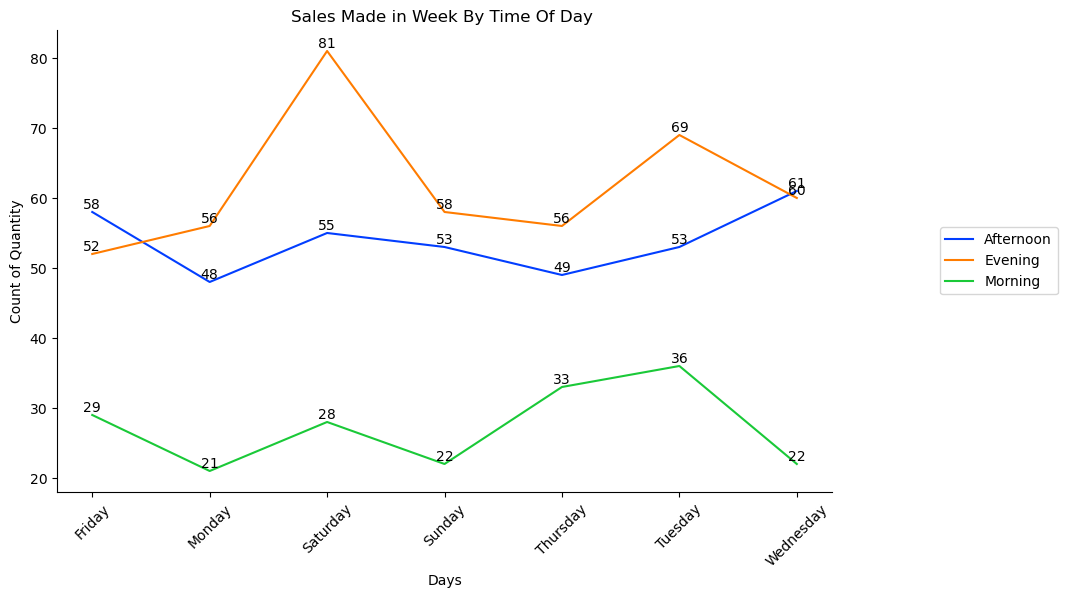

In [124]:
plt.figure(figsize=(10, 6))
no_of_sales_made = df.groupby(['Day_Name', 'time_of_day']).size().reset_index(name='Quantity')
cnt = sns.lineplot(x='Day_Name', y='Quantity', data=no_of_sales_made, hue='time_of_day', palette='bright')
for line in cnt.lines:
    x, y = line.get_data()
    for i in range(len(x)):
        plt.text(x[i], y[i], f'{y[i]:.0f}', color='black', ha='center', va='bottom')

sns.despine()
plt.title('Sales Made in Week By Time Of Day ')
plt.xlabel('Days')
plt.xticks(rotation=45)
plt.ylabel('Count of Quantity')
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.show()

**SATURDAY IS THE HIGHEST DAY OF AN WEEK WHERE 164 SALES WAS MADE INCLUDING MORNING,AFTERNOON,EVENING & MONDAY IS THE LOWEST 
DAY OF AN WEEK WHERE ONLY 125 SALES WAS MADE**

2. Which of the customer types brings the most revenue?

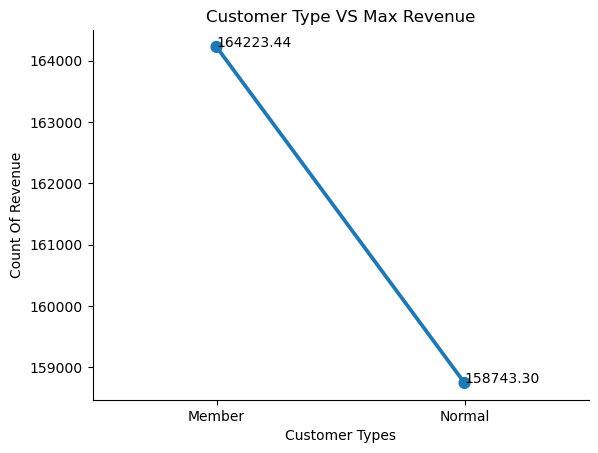

In [73]:
customer_max_revenue = df.groupby(['Customer_type'],as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)
sns.pointplot(x='Customer_type',y='Total',data=customer_max_revenue)
for index, row in customer_max_revenue.iterrows():
    plt.text(row.name, row['Total'], f'{row["Total"]:.2f}', color='black', ha="left")
sns.despine()
plt.title('Customer Type VS Max Revenue')
plt.ylabel('Count Of Revenue')
plt.xlabel('Customer Types')
plt.show()

**MEMBER CUSTOMER TYPE PRODUCE THE MOST REVENUE WHICH IS 164223.44**

3. Which city has the largest tax percent/ VAT (**Value Added Tax**)?

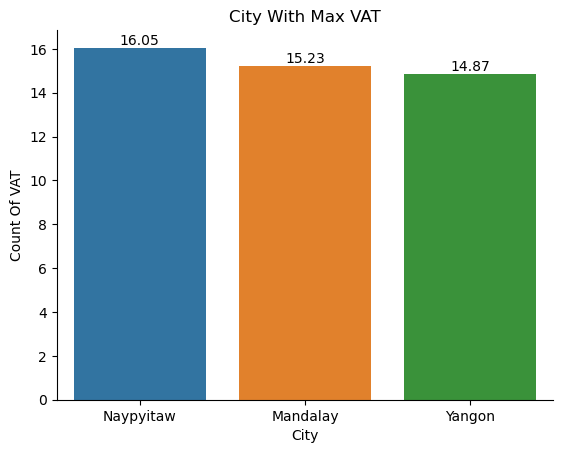

In [125]:
city_max_tax=df.groupby(['City'],as_index=False)['Tax_5_per'].mean().round(2).sort_values(by='Tax_5_per',ascending=False)
cnt=sns.barplot(data=city_max_tax,x='City',y='Tax_5_per')
cnt.bar_label(cnt.containers[0])

sns.despine()
plt.title('City With Max VAT')
plt.ylabel('Count Of VAT')
plt.xlabel('City')
plt.show()

**THE NAYPYITAW IS THE HIGHEST TAX PAYING CITY WHICH AVERAGE TAX NEAR BY 16.05 & THE YANGON IS THE LOWEST CITY WHICH 
PAYS AVG 14.87% OF TAX**

4. Which customer type pays the most in VAT?

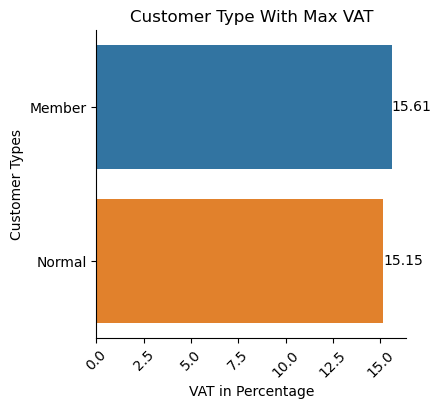

In [126]:
plt.figure(figsize=(4, 4))
customer_with_max_VAT=df.groupby(['Customer_type'],as_index=False)['Tax_5_per'].mean().round(2).sort_values(by='Tax_5_per', ascending=False)
cnt = sns.barplot(y='Customer_type',x='Tax_5_per',data=customer_with_max_VAT)
cnt.bar_label(cnt.containers[0])

sns.despine()
plt.title('Customer Type With Max VAT')
plt.xlabel('VAT in Percentage')
plt.xticks(rotation=45)
plt.ylabel('Customer Types')
plt.show()

**MEMBER CUSTOMER TYPE CAN PAYS THE MOST VAT WHICH NEAR BY OF AVG 15.61%**

# D-CUSTOMER QUESTIONS

1. How many unique customer types does the data have?

In [23]:
unique_customer=df['Customer_type'].nunique()
unique_customer

2

2. How many unique payment methods does the data have?

In [24]:
unique_pay_method=df['Payment'].nunique()
unique_pay_method

3

3. Which customer type buys the most?

In [50]:
customer_with_buys_most=df.groupby('Customer_type')['Quantity'].count().sort_values(ascending=False)
customer_with_buys_most

Customer_type
Member    501
Normal    499
Name: Quantity, dtype: int64

4. What is the gender distribution per branch?

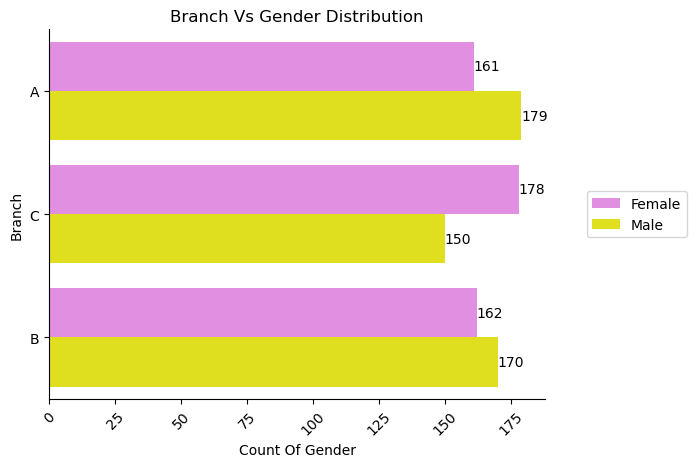

In [77]:
cnt=sns.countplot(y='Branch',data=df,hue='Gender',palette={'Male': 'yellow', 'Female': 'violet'})
cnt.bar_label(cnt.containers[0])
cnt.bar_label(cnt.containers[1])

sns.despine()
plt.title('Branch Vs Gender Distribution')
plt.xlabel('Count Of Gender')
plt.xticks(rotation=45)
plt.ylabel('Branch')
plt.legend(loc='center right',bbox_to_anchor=(1.3,0.5))
plt.show()

5. Which time of the day do customers give most ratings?

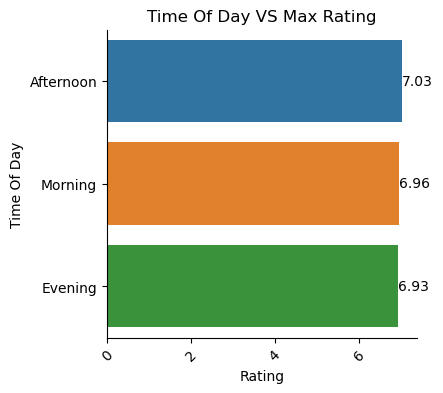

In [12]:
plt.figure(figsize=(4, 4))
customer_with_most_rating=df.groupby(['time_of_day'],as_index=False)['Rating'].mean().round(2).sort_values(by='Rating', ascending=False)
cnt = sns.barplot(y='time_of_day',x='Rating',data=customer_with_most_rating)
cnt.bar_label(cnt.containers[0])

sns.despine()
plt.title('Time Of Day VS Max Rating')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.ylabel('Time Of Day')
plt.show()

6. Which time of the day do customers give most ratings per branch?

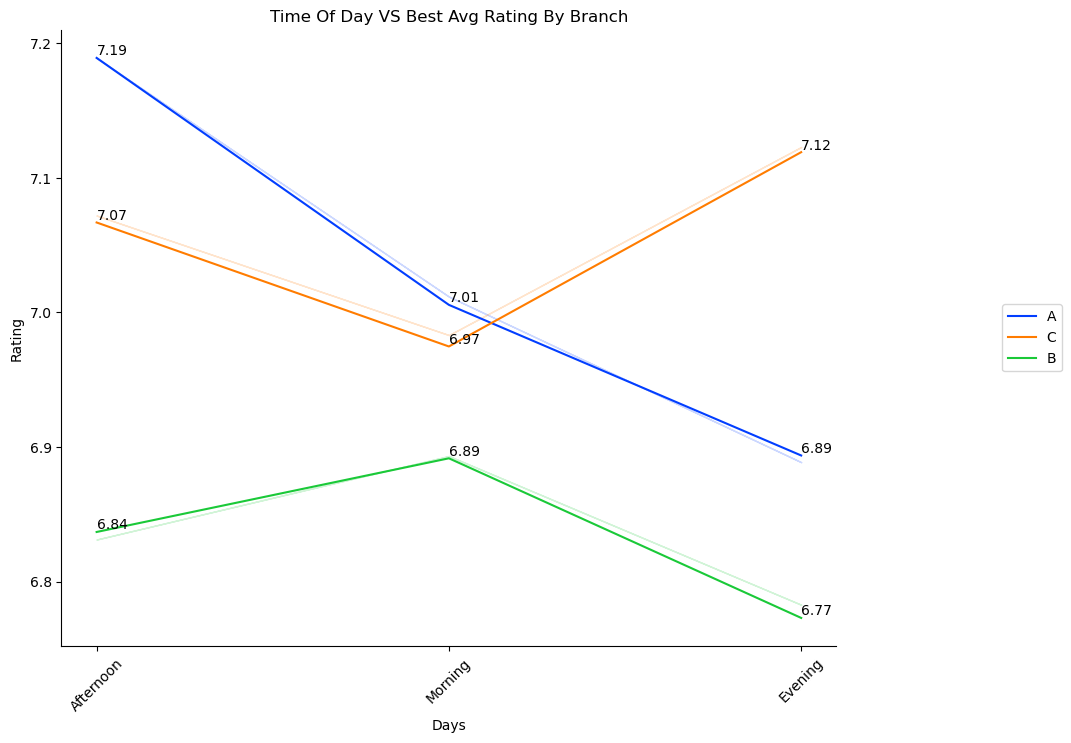

In [125]:
plt.figure(figsize=(10, 8))
cnt=sns.lineplot(x='time_of_day',y='Rating',data=df,hue='Branch',palette='bright',errorbar=('ci',0))
for line in cnt.lines:
    x, y = line.get_data()
    for i in range(len(x)):
        plt.text(x[i], y[i], f'{y[i]:.2f}', color='black', ha='left', va='bottom')
sns.despine()
plt.title('Time Of Day VS Best Avg Rating By Branch')
plt.xlabel('Days')
plt.xticks(rotation=45)
plt.ylabel('Rating')
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.show()

7. Which day of the week has the best avg ratings?

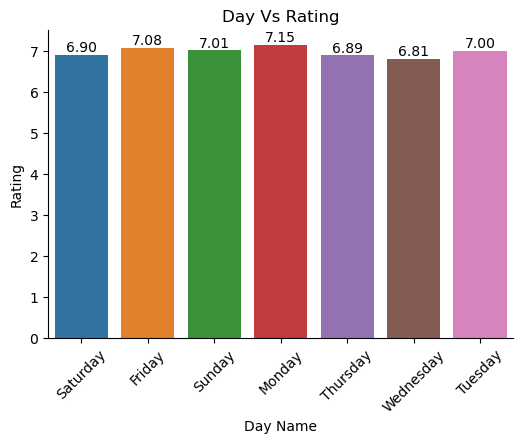

In [164]:
plt.figure(figsize=(6, 4)) 
cnt = sns.barplot(x='Day_Name', y='Rating', data=df, errorbar=('ci',0))
for container in cnt.containers:
    cnt.bar_label(container, fmt='%.2f')

sns.despine()
plt.title('Day Vs Rating')
plt.xlabel('Day Name')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

8. Which day of the week has the best average ratings per branch?

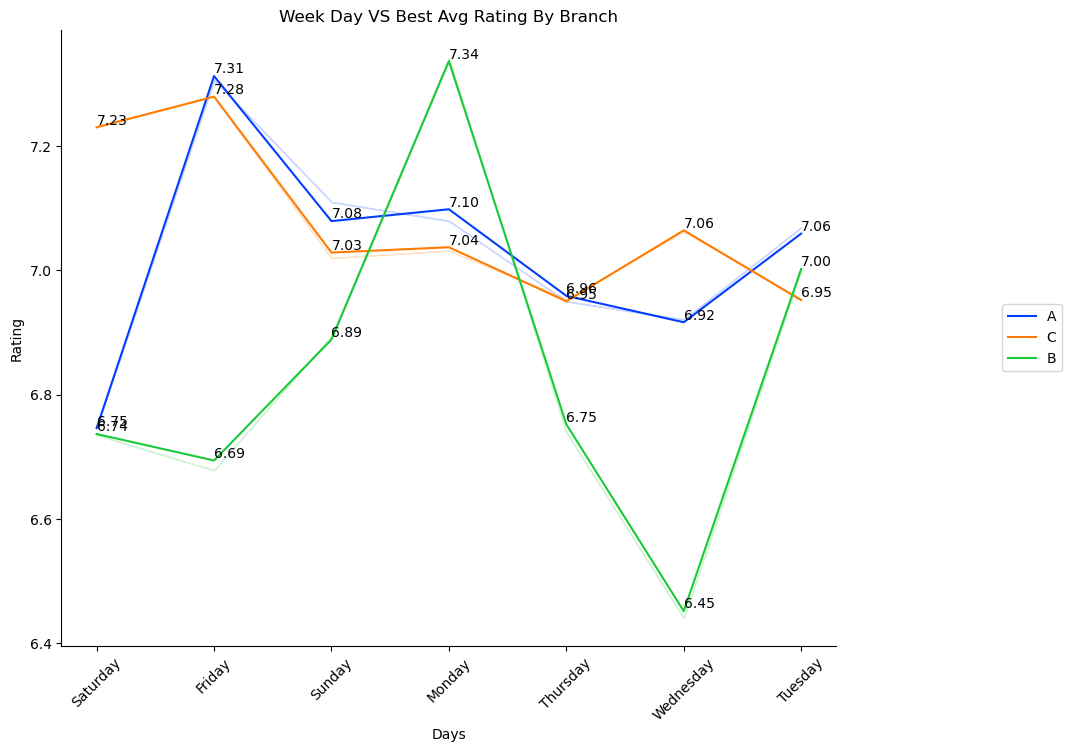

In [108]:
plt.figure(figsize=(10, 8))
cnt=sns.lineplot(x='Day_Name',y='Rating',data=df,hue='Branch',palette='bright',errorbar=('ci',0))
for line in cnt.lines:
    x, y = line.get_data()
    for i in range(len(x)):
        plt.text(x[i], y[i], f'{y[i]:.2f}', color='black', ha='left', va='bottom')
sns.despine()
plt.title('Week Day VS Best Avg Rating By Branch')
plt.xlabel('Days')
plt.xticks(rotation=45)
plt.ylabel('Rating')
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.show()

# **CONCLUSION**

**our analysis has provided a deep understanding of Walmart's	and strategic initiatives. As Walmart continues to 
evolve in the dynamic retail landscape,leveraging data-driven insights and customer-centric strategies 
will be pivotal for sustaining its growth and market leadership.**